### Fed Fund Rate

•	The federal funds rate is the target interest rate set by the  Federal Open Market Committee (FOMC).

•	This is the rate at which commercial banks borrow and lend their excess reserves to each other overnight.

•	The FOMC sets a target federal funds rate eight times a year, based on prevailing economic conditions.

•	The federal funds rate can influence short-term rates on consumer loans and credit cards.

•	Investors keep an eye out on the federal funds rate as well because it has an impact on the stock market.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
fed_fund_data =  pd.read_csv("FEDFUNDS_DATA.csv")


### Data Exploration

In [3]:
fed_fund_data.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [4]:
fed_fund_data.tail()

,DATE,FEDFUNDS
810,2022-01-01,0.08
811,2022-02-01,0.08
812,2022-03-01,0.20
813,2022-04-01,0.33
814,2022-05-01,0.77


In [5]:
# check shape of dataset
fed_fund_data.shape

(815, 2)

There are **815 rows & 2 columns** in dataset.

In [6]:
# check basic info of dataset
fed_fund_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      815 non-null    object 
 1   FEDFUNDS  815 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [7]:
# check statisical summary of dataset
fed_fund_data.describe()

,FEDFUNDS
count,815.000000
mean,4.611975
std,3.628001
min,0.050000
25%,1.755000
50%,4.140000
75%,6.335000
max,19.100000


In [8]:
# check is there missing values present in dataset or not
fed_fund_data.isnull().sum()

DATE        0
FEDFUNDS    0
dtype: int64

No missing values present in dataset.

* **Convert date into datetime format**

In [9]:
fed_fund_data["DATE"]= pd.to_datetime(fed_fund_data["DATE"])

In [10]:
fed_fund_data['YEAR'] = fed_fund_data['DATE'].dt.year
fed_fund_data['MONTH'] = fed_fund_data['DATE'].dt.month
fed_fund_data['DAY'] = fed_fund_data['DATE'].dt.day
#fed_fund_data.drop("DATE", axis=1, inplace=True)
fed_fund_data.head()

,DATE,FEDFUNDS,YEAR,MONTH,DAY
0,1954-07-01,0.80,1954,7,1
1,1954-08-01,1.22,1954,8,1
2,1954-09-01,1.07,1954,9,1
3,1954-10-01,0.85,1954,10,1
4,1954-11-01,0.83,1954,11,1


Here we convert the **"DATE"** feature into datetime format.

### Exploratory Data Analysis

* **Plot lineplot to see Fed fund rate per years**

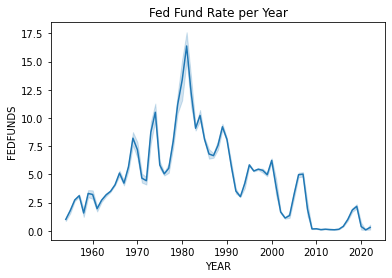

In [11]:
sns.lineplot(x= fed_fund_data["YEAR"], y=fed_fund_data['FEDFUNDS'])
plt.title("Fed Fund Rate per Year")
plt.show()

* We can see here the fed fund rate is higher in the year **1980-1982**.

In [12]:
fed_fund_data[fed_fund_data['FEDFUNDS']==(fed_fund_data['FEDFUNDS'].max())]

,DATE,FEDFUNDS,YEAR,MONTH,DAY
323,1981-06-01,19.1,1981,6,1


* Fed fund rate is maximum in the the year **06-1981** that is **19.1**.

In [13]:
# Set date as Index
fed_fund_data = fed_fund_data.set_index('DATE')
fed_fund_data.head()

,FEDFUNDS,YEAR,MONTH,DAY
DATE,,,,
1954-07-01,0.80,1954,7,1
1954-08-01,1.22,1954,8,1
1954-09-01,1.07,1954,9,1
1954-10-01,0.85,1954,10,1
1954-11-01,0.83,1954,11,1


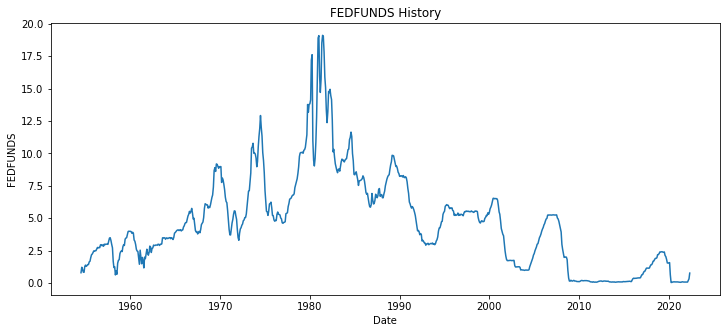

In [14]:
plt.figure(figsize = (12,5))
plt.plot(fed_fund_data["FEDFUNDS"])
plt.xticks(rotation = 0)
plt.title("FEDFUNDS History")
plt.xlabel("Date")
plt.ylabel("FEDFUNDS")
plt.show()

In [15]:
x2=fed_fund_data.set_index("YEAR")
x3=x2.loc[[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],:]
x4=x3.pivot_table(index="YEAR", values="FEDFUNDS",columns="MONTH")
x4

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2012,0.08,0.10,0.13,0.14,0.16,0.16,0.16,0.13,0.14,0.16,0.16,0.16
2013,0.14,0.15,0.14,0.15,0.11,0.09,0.09,0.08,0.08,0.09,0.08,0.09
2014,0.07,0.07,0.08,0.09,0.09,0.10,0.09,0.09,0.09,0.09,0.09,0.12
2015,0.11,0.11,0.11,0.12,0.12,0.13,0.13,0.14,0.14,0.12,0.12,0.24
2016,0.34,0.38,0.36,0.37,0.37,0.38,0.39,0.40,0.40,0.40,0.41,0.54
2017,0.65,0.66,0.79,0.90,0.91,1.04,1.15,1.16,1.15,1.15,1.16,1.30
2018,1.41,1.42,1.51,1.69,1.70,1.82,1.91,1.91,1.95,2.19,2.20,2.27
2019,2.40,2.40,2.41,2.42,2.39,2.38,2.40,2.13,2.04,1.83,1.55,1.55
2020,1.55,1.58,0.65,0.05,0.05,0.08,0.09,0.10,0.09,0.09,0.09,0.09


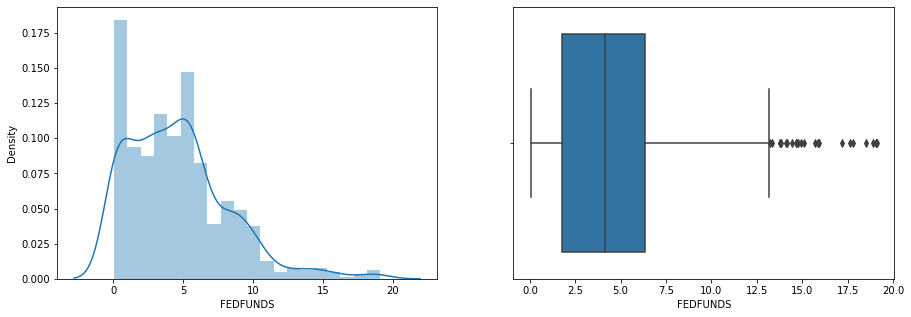

In [16]:
# Distribution of fund
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot((fed_fund_data['FEDFUNDS']))

plt.subplot(1,2,2)
sns.boxplot((fed_fund_data['FEDFUNDS']))

plt.show()

* Here we can see some outliers present in the dataset. 

In [17]:
    q1 = fed_fund_data['FEDFUNDS'].quantile(0.25)
    q3 = fed_fund_data['FEDFUNDS'].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    fed_fund_data.loc[fed_fund_data['FEDFUNDS']<lower_limit,'FEDFUNDS'] = lower_limit
    fed_fund_data.loc[fed_fund_data['FEDFUNDS']>upper_limit,'FEDFUNDS'] = upper_limit

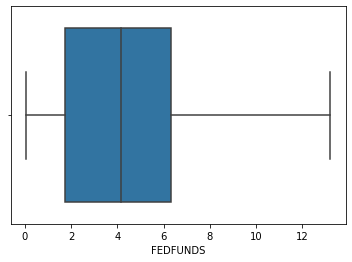

In [18]:
sns.boxplot((fed_fund_data['FEDFUNDS']))
plt.show()

Outliers removed succesfully.

In [19]:
fed_fund_data.head()

,FEDFUNDS,YEAR,MONTH,DAY
DATE,,,,
1954-07-01,0.80,1954,7,1
1954-08-01,1.22,1954,8,1
1954-09-01,1.07,1954,9,1
1954-10-01,0.85,1954,10,1
1954-11-01,0.83,1954,11,1


In [20]:
fed_fund_data.to_csv("final_fed.csv",index=False)

### Feature Scaling

In [21]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

col= fed_fund_data.columns
sc=StandardScaler()
fed_fund_data[col] = sc.fit_transform(fed_fund_data[col])
fed_fund_data.head()

,FEDFUNDS,YEAR,MONTH,DAY
DATE,,,,
1954-07-01,-1.103537,-1.73168,0.144577,0.0
1954-08-01,-0.979340,-1.73168,0.434086,0.0
1954-09-01,-1.023696,-1.73168,0.723595,0.0
1954-10-01,-1.088752,-1.73168,1.013104,0.0
1954-11-01,-1.094666,-1.73168,1.302612,0.0
